# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [139]:
#Load URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&q="
units = "Imperial"

#Lists to append API data 
name_of_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#city counter
city_counter = 1

#print beginning of print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities
for city in cities:
    try:
        
        response = requests.get(url + city + "&units=" + units).json()
        name_of_city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_counter_record = response["name"]
        print(f"Processing Record {city_counter} | {city_counter_record}")
    
        #increase city counter by 1 to automatically loop through all the cities
        city_counter = city_counter + 1
        
        
     #If loop can't find city information, skip to the next city
    except:
        print(f"City not found. Skipping...")

print(f"-----------------------")
print(f"Data Retrieval Complete")    
print(f"-----------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | George Town
Processing Record 2 | Yulara
Processing Record 3 | Port Maria
Processing Record 4 | Punta Arenas
Processing Record 5 | Ushuaia
Processing Record 6 | Umarkot
Processing Record 7 | Busselton
Processing Record 8 | Vanimo
Processing Record 9 | Muros
Processing Record 10 | Rikitea
Processing Record 11 | Longyearbyen
Processing Record 12 | Te Anau
Processing Record 13 | Acapulco de Juarez
Processing Record 14 | Natal
Processing Record 15 | Hermanus
Processing Record 16 | Hobart
Processing Record 17 | Tooele
Processing Record 18 | Cabo San Lucas
Processing Record 19 | Nome
Processing Record 20 | Virginia Beach
Processing Record 21 | New Norfolk
Processing Record 22 | Mitsamiouli
Processing Record 23 | Laas
Processing Record 24 | Lavrentiya
Processing Record 25 | Cherskiy
Processing Record 26 | Ilulissat
Processing Record 27 | Mount Gambier
Processing Record 28 | Mataura
City not found. Skipping...
City 

Processing Record 229 | Prainha
Processing Record 230 | Marsh Harbour
Processing Record 231 | Feijo
City not found. Skipping...
Processing Record 232 | Salta
Processing Record 233 | Bakchar
Processing Record 234 | Saskylakh
Processing Record 235 | Mizan Teferi
Processing Record 236 | Pangnirtung
City not found. Skipping...
Processing Record 237 | Loa Janan
City not found. Skipping...
Processing Record 238 | Burnie
Processing Record 239 | Tyrma
Processing Record 240 | Makakilo City
Processing Record 241 | Saint George
Processing Record 242 | Oistins
Processing Record 243 | Miastko
Processing Record 244 | Severo-Kuril'sk
Processing Record 245 | Abu Samrah
Processing Record 246 | Sittwe
Processing Record 247 | Chenzhou
Processing Record 248 | Marawi
Processing Record 249 | Luderitz
Processing Record 250 | Kibaya
Processing Record 251 | Provideniya
Processing Record 252 | Sao Filipe
Processing Record 253 | Acatlan
Processing Record 254 | Morozovsk
Processing Record 255 | Khatanga
Processin

Processing Record 460 | Zhigansk
Processing Record 461 | Lewistown
City not found. Skipping...
Processing Record 462 | Wukari
Processing Record 463 | Xixiang
Processing Record 464 | Luau
Processing Record 465 | Esim
Processing Record 466 | Umea
Processing Record 467 | Half Moon Bay
Processing Record 468 | Matagami
Processing Record 469 | Olhao
Processing Record 470 | Rexburg
City not found. Skipping...
Processing Record 471 | Paamiut
Processing Record 472 | Winchester
Processing Record 473 | Peleduy
Processing Record 474 | Matsumoto
Processing Record 475 | Benguela
Processing Record 476 | Fengzhen
Processing Record 477 | Boca do Acre
City not found. Skipping...
Processing Record 478 | Magaria
Processing Record 479 | Muriwai Beach
Processing Record 480 | Mollendo
Processing Record 481 | Kotdwara
Processing Record 482 | Saint-Jerome
Processing Record 483 | Solnechnyy
Processing Record 484 | Smithers
Processing Record 485 | Kargasok
Processing Record 486 | Arrondissement de Morlaix
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
city_weather_data = pd.DataFrame({
        "City": name_of_city,
        "Cloudiness (%)": cloudiness,
        "Country": country,
        "Date": date,
        "Humidity (%)": humidity,
        "Latitude": lat,
        "Longitude": lng,
        "Temperature (F)": max_temp,
        "Wind Speed (mph)": wind_speed})


city_weather_data.count()

City                590
Cloudiness (%)      590
Country             590
Date                590
Humidity (%)        590
Latitude            590
Longitude           590
Temperature (F)     590
Wind Speed (mph)    590
dtype: int64

In [195]:
#Export city data into a new csv
city_weather_data.to_csv("city_weather_data.csv")

#Display df
city_weather_data.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,George Town,20,MY,1579893009,65,5.41,100.34,80.6,3.36
1,Yulara,60,AU,1579893060,22,-25.24,130.99,78.8,8.05
2,Port Maria,20,JM,1579893225,65,18.37,-76.89,82.4,10.29
3,Punta Arenas,90,CL,1579893133,87,-53.15,-70.92,44.6,10.29
4,Ushuaia,75,AR,1579892852,54,-54.80,-68.30,55.4,3.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [144]:
#Time module for displaying today's date 
import time
import datetime

date = time.strftime("%x")
date

'01/24/20'

<function matplotlib.pyplot.show(*args, **kw)>

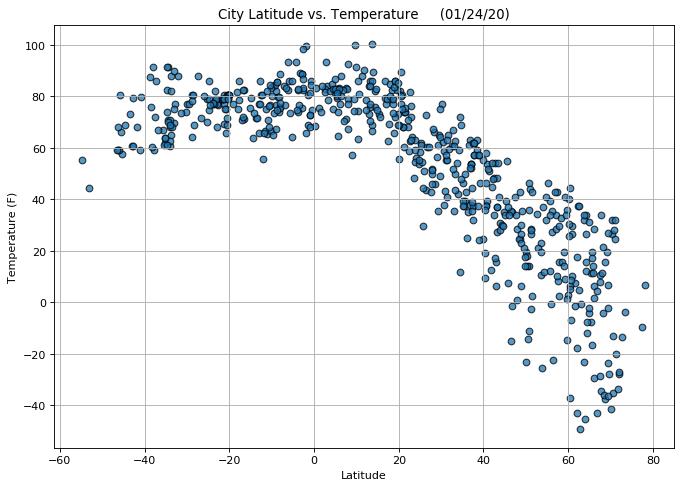

In [149]:
#latitude vs max temperature

plt.figure(figsize=(10,7), dpi=80)
plt.scatter(city_weather_data["Latitude"], city_weather_data["Temperature (F)"], alpha=.75, marker="o", edgecolors="black")

plt.title("City Latitude vs. Temperature     " + "(" + date + ")")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_v_Temp.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

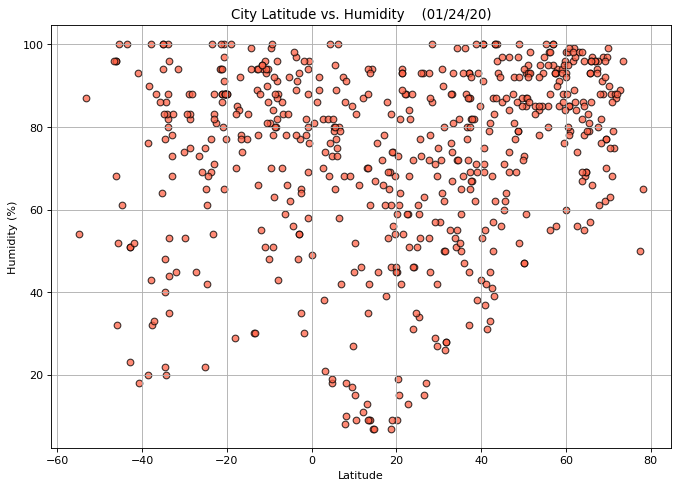

In [150]:
#latitude vs humidity

plt.figure(figsize=(10,7), dpi=80)
plt.scatter(city_weather_data["Latitude"], city_weather_data["Humidity (%)"], alpha=.75, marker="o", facecolors="tomato", 
            edgecolors="black")

plt.title("City Latitude vs. Humidity    " + "(" + date + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_v_Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

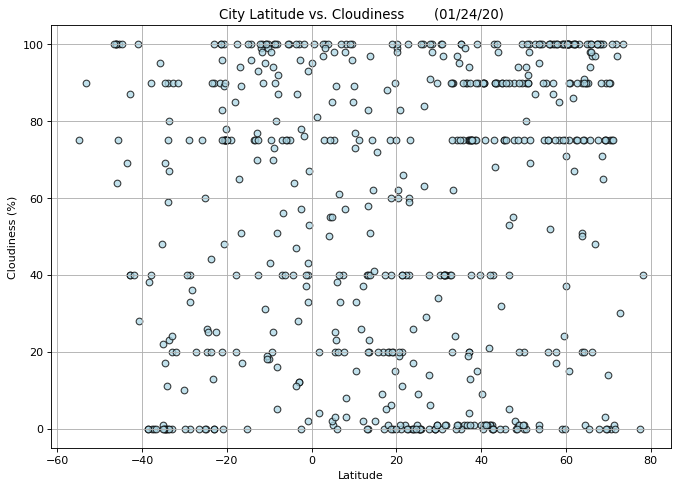

In [151]:
#latitude vs cloudiness

plt.figure(figsize=(10,7), dpi=80)
plt.scatter(city_weather_data["Latitude"], city_weather_data["Cloudiness (%)"], alpha=.75, marker="o", 
            facecolors="lightblue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness       " + "(" + date + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_v_cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

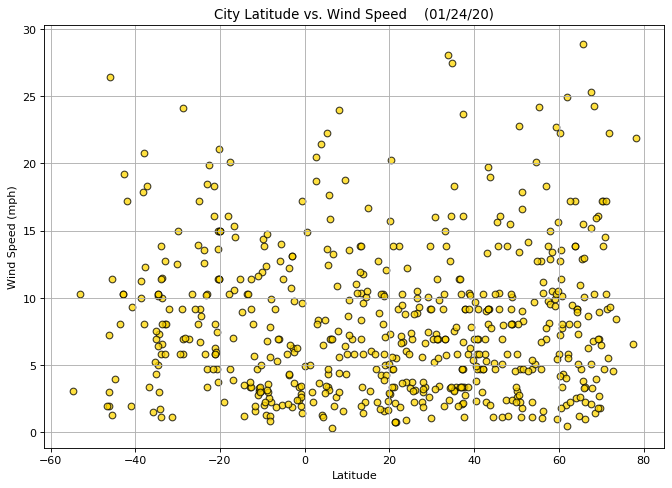

In [152]:
#latitude vs wind speed
plt.figure(figsize=(10,7), dpi=80)
plt.scatter(city_weather_data["Latitude"], city_weather_data["Wind Speed (mph)"], alpha=.75, marker="o", 
           facecolors="gold", edgecolors="black")

plt.title("City Latitude vs. Wind Speed    " + "(" + date + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_v_wind.png")
plt.show

## Linear Regression

In [153]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotLinReg(x_values, y_values, ytitle, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Regression values
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

     #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(ytitle)
    plt.title(title)
    plt.annotate(line_eq, text_coord,fontsize=14,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

In [154]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = city_weather_data[city_weather_data["Latitude"] >= 0]
southern_hemi = city_weather_data[city_weather_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.38x +94.99
The r-squared is: -0.8651185809415848


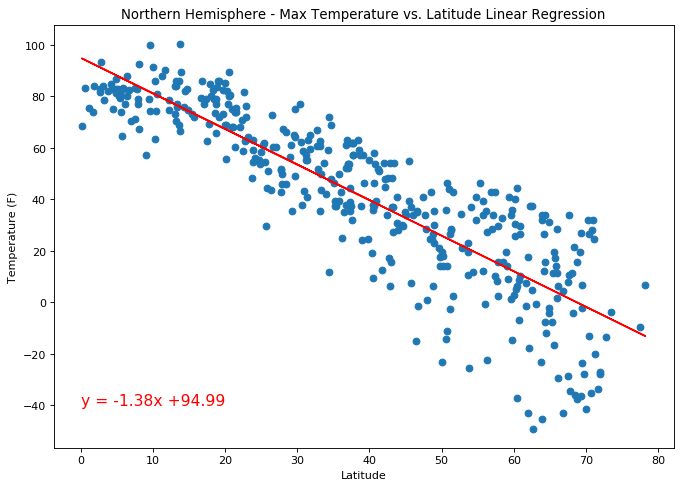

In [170]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature (F)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Temperature (F)", 
           "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression", (0,-40))

plt.savefig("NH_temp_v_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.28x +81.46
The r-squared is: 0.42522579093058277


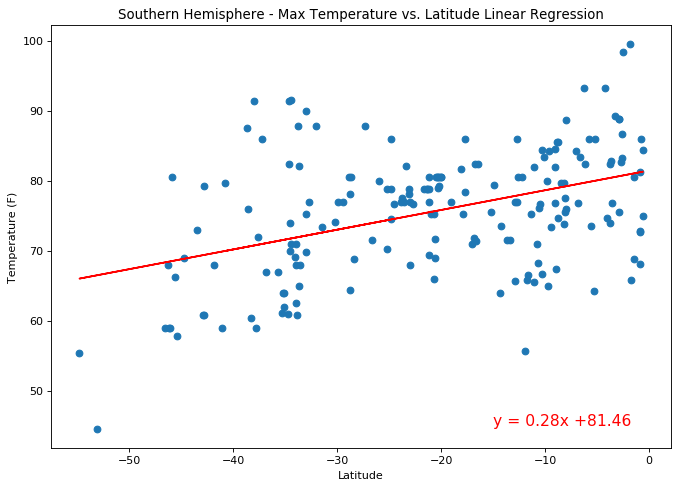

In [171]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature (F)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Temperature (F)", 
           "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression", (-15,45))

plt.savefig("SH_temp_v_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.48x +53.47
The r-squared is: 0.4228529360780372


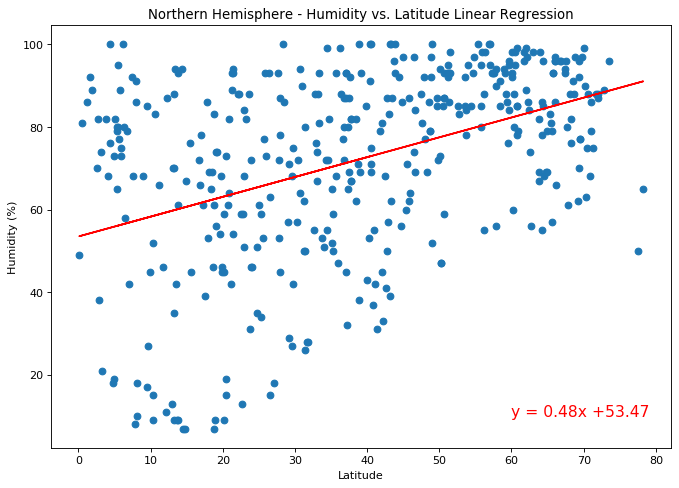

In [172]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity (%)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (60,10))

plt.savefig("NH_humidity_v_lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.27x +80.66
The r-squared is: 0.17308425753718945


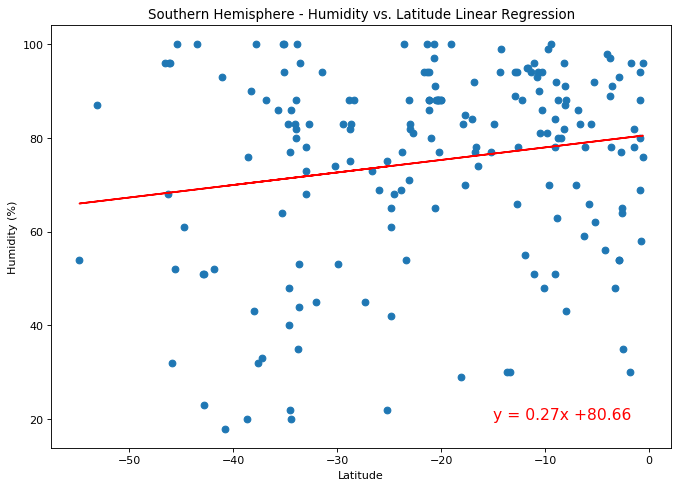

In [185]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity (%)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-15,20))

plt.savefig("SH_humidity_v_lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x +38.43
The r-squared is: 0.22982472247941635


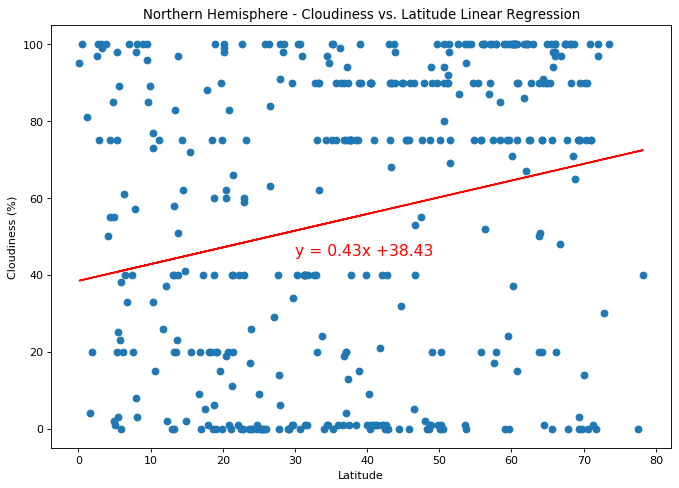

In [186]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness (%)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (30,45))

plt.savefig("NH_cloudy_v_lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.39x +64.71
The r-squared is: 0.14764915353590005


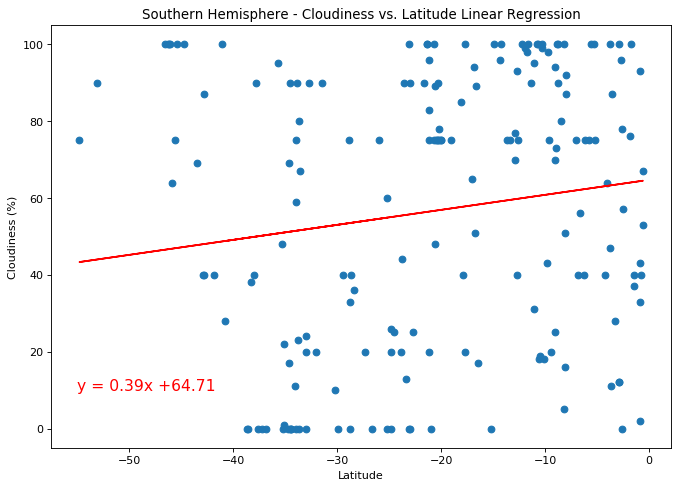

In [187]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness (%)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",(-55,10))

plt.savefig("SH_cloudy_v_lat")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x +6.78
The r-squared is: 0.12081024352476695


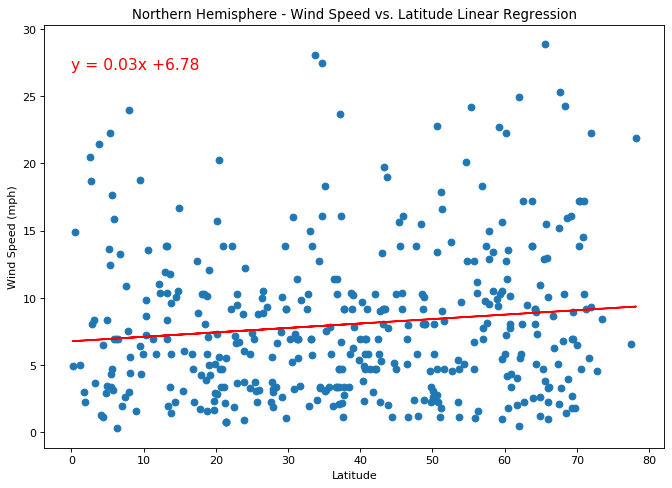

In [191]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed (mph)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Wind Speed (mph)", 
           "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0,27))

plt.savefig("NH_wind_v_lat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x +6.59
The r-squared is: -0.1993594052864499


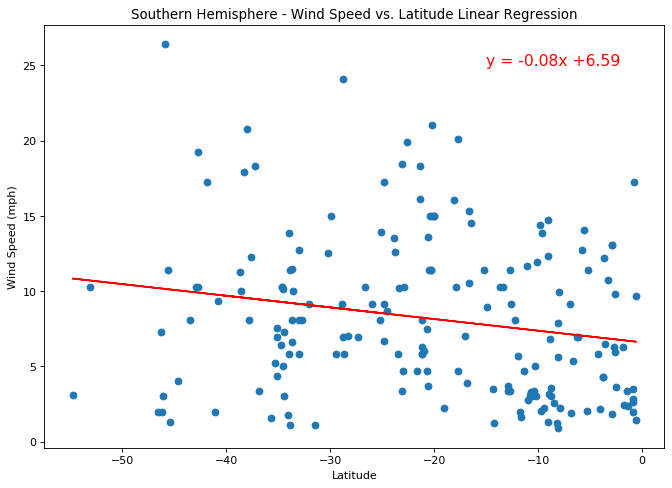

In [194]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed (mph)"]

plt.figure(figsize=(10,7), dpi=80)
plotLinReg(x_values, y_values, "Wind Speed (mph)", 
           "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-15,25))

plt.savefig("SH_wind_v_lat")